 # Here is the list of models 
  1. [LinearRegression](#LinearRegression)
  2. [LogisticRegression](#LogisticRegression)
  3. [KNN(K nearest neighbours)](#KNN)
  4. [SVM (support vector machine)](#SVM(SupportVectorMachine))
  5. [Decision Trees & Random Forest](#DecisionTrees&RandomForest)
  6. [Principal Component Analysis](#PrincipalComponentAnalysis)
  7. [K Means Clustering](#K-MeansClustering)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf  

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
%matplotlib inline

# LinearRegression

In [78]:
from sklearn.linear_model import LinearRegression

In [5]:
model=LinearRegression(normalize=True)

In [3]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [5]:
x,y=np.arange(10).reshape((5,2)),range(5)

In [7]:
x1,x2,y1,y2=train_test_split(x,y,test_size=0.3)

In [8]:
x1

array([[6, 7],
       [4, 5],
       [8, 9]])

In [9]:
x2

array([[2, 3],
       [0, 1]])

In [10]:
y1

[3, 2, 4]

In [11]:
y2

[1, 0]

In [79]:
df=pd.read_csv("C:/Users/pksds/Documents/mycaptain/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv")

In [16]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [17]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [18]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

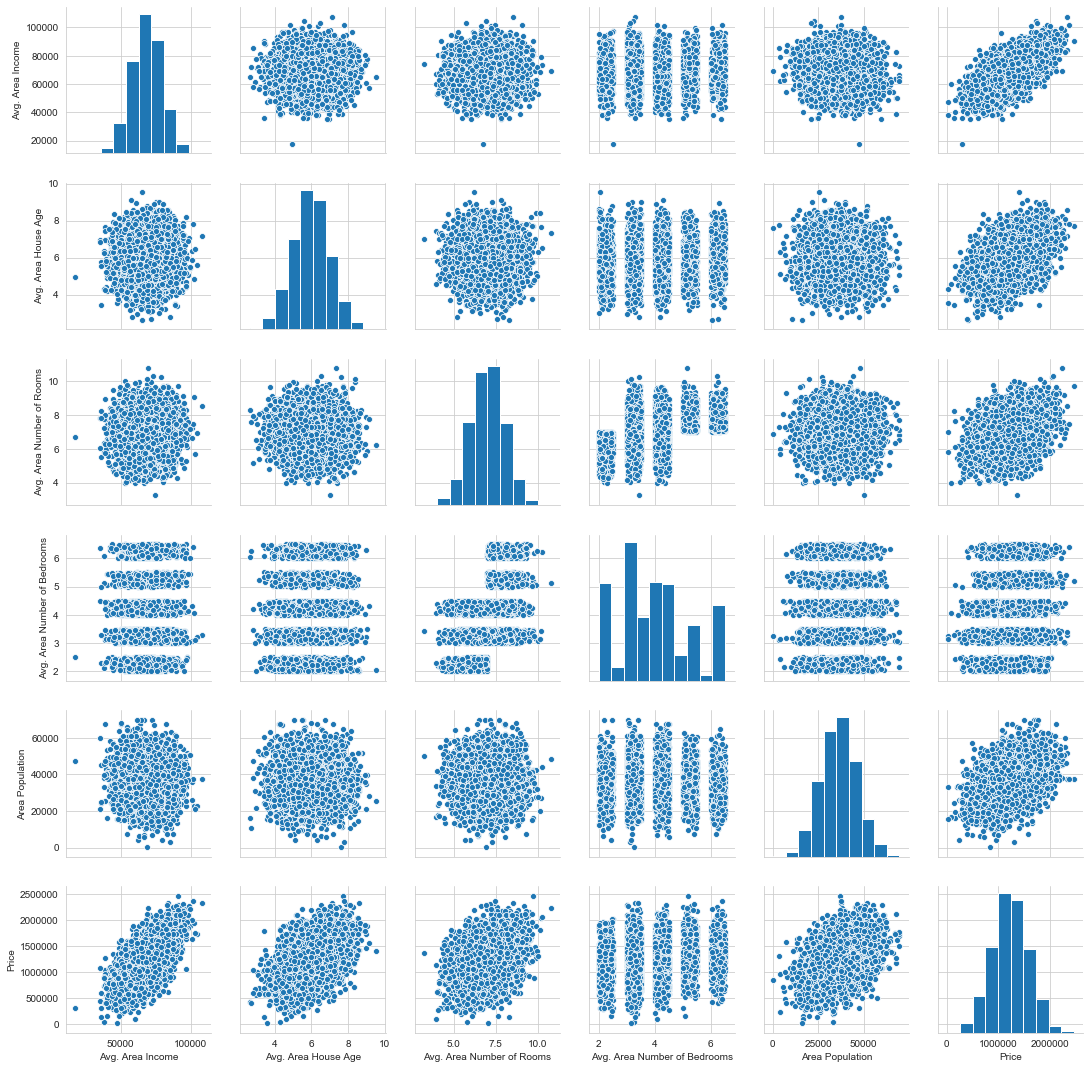

In [80]:
sns.pairplot(df)

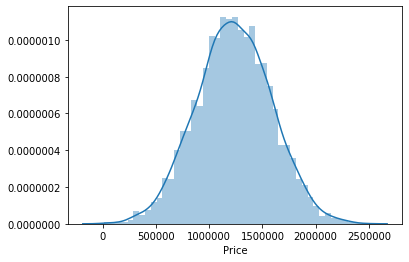

In [20]:
sns.distplot(df.Price)

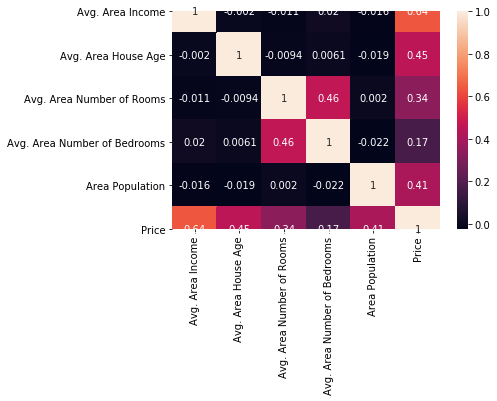

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [23]:
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']]

In [24]:
y=df["Price"]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [85]:
lm=LinearRegression()


In [86]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
lm.intercept_

1.303261031300759

# LogisticRegression

## analyzing the data

In [21]:
train=pd.read_csv('titanic_train.csv')

In [27]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
print(str(train.index))

RangeIndex(start=0, stop=891, step=1)


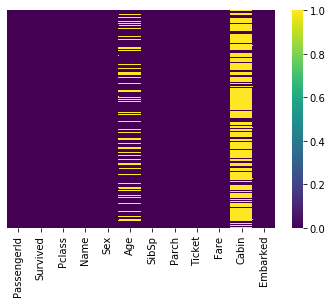

In [23]:
sns.heatmap(train.isnull(),yticklabels=
            False,cbar=True,cmap="viridis")

In [24]:
sns.set_style('whitegrid')

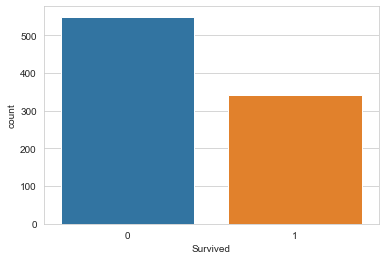

In [25]:
sns.countplot(x='Survived',data=train)

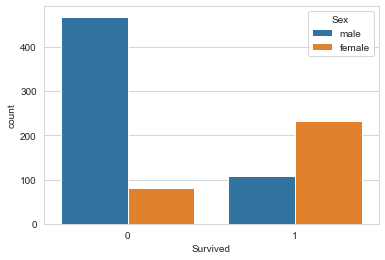

In [30]:
sns.countplot(x="Survived",hue="Sex",data=train)

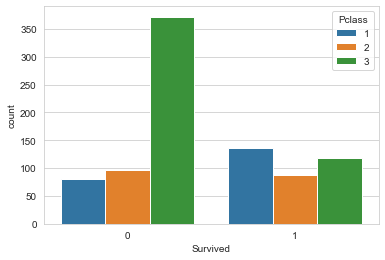

In [31]:
sns.countplot(x="Survived",hue="Pclass",data=train)

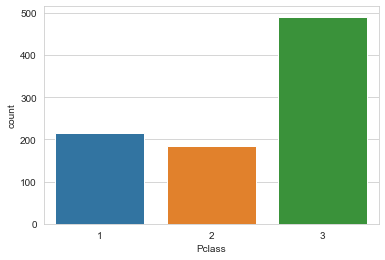

In [34]:
sns.countplot(x='Pclass',data=train)


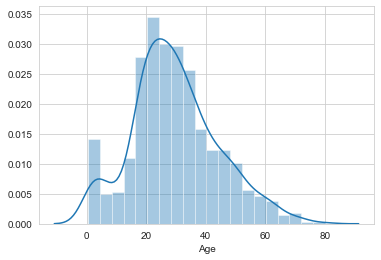

In [35]:
sns.distplot(train.Age.dropna())

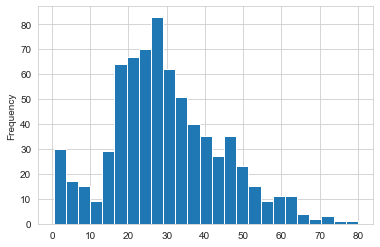

In [36]:
train['Age'].plot.hist(bins=25)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


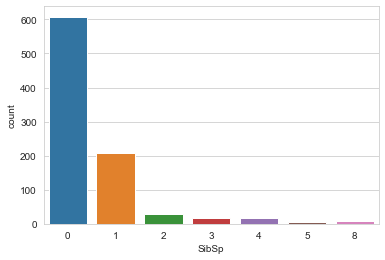

In [38]:
sns.countplot(x='SibSp',data=train)

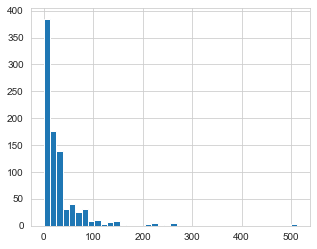

In [34]:
train['Fare'].hist(bins=40,figsize=(5,4))

In [41]:
cf.go_offline()

In [48]:
train['Fare'].iplot(kind='hist',bins=35)

## Data Wrangling

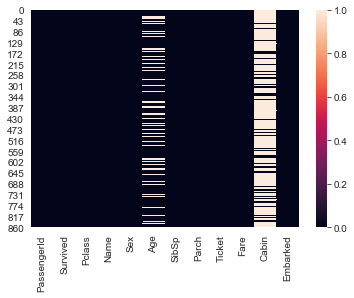

In [38]:
sns.heatmap(train.isnull())

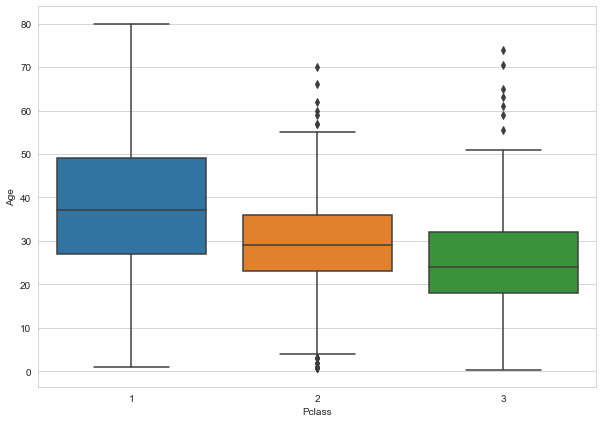

In [39]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

we could see that more the age ,they are rich so they buy 1st plcass .Considering this analogy

In [40]:
def imput(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age): 
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [43]:
train['Age']=train[['Age','Pclass']].apply(imput,axis=1)

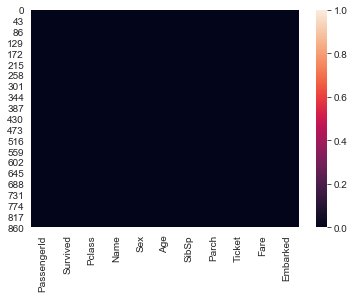

In [44]:
sns.heatmap(train.isnull())

In [41]:
train.drop('Cabin',axis=1,inplace=True)


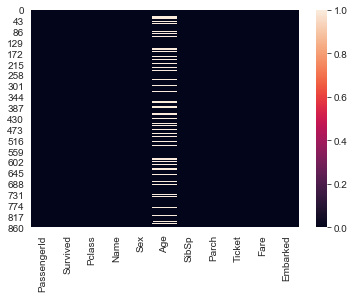

In [42]:
sns.heatmap(train.isnull())

In [51]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [46]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [48]:
train.dropna(subset=['Embarked'],inplace=True,axis=0)

In [49]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

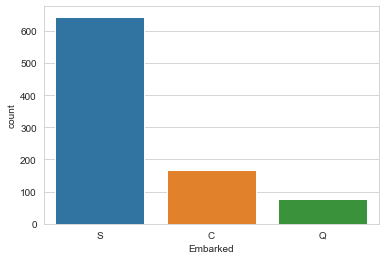

In [52]:
sns.countplot('Embarked',data=train)

In [54]:
sex=pd.get_dummies(train.Sex,drop_first=True)

In [55]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [50]:
pcl=pd.get_dummies(train.Pclass,drop_first=True)
pcl

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [56]:
embarked=pd.get_dummies(train.Embarked,drop_first=True)

In [57]:

embarked


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [77]:
train=pd.concat([train,sex,embarked,pcl],axis=1)

In [61]:
train.head(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,1,0,0


In [65]:
train.drop(['Pclass','Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [78]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Train & Test Data


In [79]:
from sklearn.linear_model import LogisticRegression

In [81]:
x=train.drop('Survived',axis=1)
y=train["Survived"]

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)



In [92]:
x_test

,Age,SibSp,Parch,Fare,male,Q,S,2,3
511,24.0,0,0,8.05,1,0,1,0,1
613,24.0,0,0,7.75,1,1,0,0,1
615,24.0,1,2,65.00,0,0,1,1,0
337,41.0,0,0,134.50,0,0,0,0,0
718,24.0,0,0,15.50,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
792,24.0,8,2,69.55,0,0,1,0,1
828,24.0,0,0,7.75,1,1,0,0,1
732,29.0,0,0,0.00,1,0,1,1,0
669,37.0,1,0,52.00,0,0,1,0,0


In [84]:
log=LogisticRegression()

In [85]:
log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
pred=log.predict(x_test)

In [88]:
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [2]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [84]:
print(confusion_matrix(y_test,pred))

[[133  21]
 [ 40  74]]


In [90]:
accuracy_score(y_test,pred)

0.8164794007490637

# KNN

In [4]:
%matplotlib inline

In [6]:
df=pd.read_csv("Classified Data",index_col=0)

In [7]:
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


#standardize the values (get values which are on the same scale)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scalar=StandardScaler()

In [14]:
scalar.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaled_features=scalar.transform(df.drop('TARGET CLASS',axis=1))

In [17]:
#this si the scaled version of actual values(lot of times they are closed to each other)
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [21]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:10])

In [22]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [23]:
from sklearn.model_selection import train_test_split


In [24]:
x=df_feat
y=df["TARGET CLASS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [42]:
pred=knn.predict(x_test)

In [43]:
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(confusion_matrix(y_test,pred))

[[151   8]
 [ 15 126]]


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [47]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0.5, 1.0, 'Error Rate vs K')

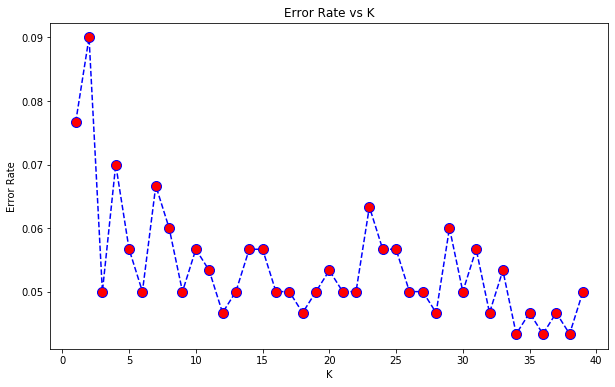

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title("Error Rate vs K")

# SVM(SupportVectorMachine)

In [80]:
from sklearn.svm import SVC

In [13]:
from sklearn.datasets import load_breast_cancer

In [14]:
cancer=load_breast_cancer()

In [15]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [18]:
df_feat=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [20]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [22]:
x=df_feat
y= cancer['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [25]:
model=SVC()

In [26]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
pred=model.predict(x_test)

In [28]:
print(confusion_matrix(y_test,pred))

[[  0  66]
 [  0 105]]


In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.61      1.00      0.76       105

    accuracy                           0.61       171
   macro avg       0.31      0.50      0.38       171
weighted avg       0.38      0.61      0.47       171



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



we could see that 0 as precision which is because our model is not yet standardized(normalize the data)

In [34]:
#grid search to get better results 
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}       

In [40]:
grid=GridSearchCV(SVC(),param_grid,verbose=3)


In [ ]:
grid.fit(x_train,y_train)

In [47]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [50]:
grid_pred=grid.predict(x_test)

In [51]:
print(confusion_matrix(y_test,grid_pred))

[[ 60   6]
 [  3 102]]


In [52]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



now , we could see that the required results are obtained by using gridsearch 

# DecisionTrees&RandomForest

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
df=pd.read_csv('kyphosis.csv')

In [57]:
df.head() #kyphosis is a vertebrea disease , Age refers the no of months ,number is the no of affected vertebrates, start is the starting bone which is affected

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


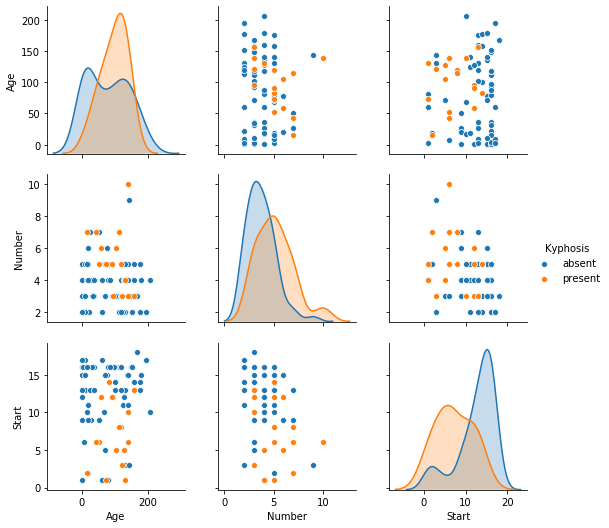

In [62]:
sns.pairplot(df,hue='Kyphosis')

In [64]:
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [67]:
dtree=DecisionTreeClassifier()

In [68]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
pred=dtree.predict(x_test)

In [71]:
print(confusion_matrix(y_test,pred))

[[59  7]
 [ 9 96]]


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        66
           1       0.93      0.91      0.92       105

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc=RandomForestClassifier(n_estimators=200)

In [75]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rfc_pred=rfc.predict(x_test)

In [77]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 61   5]
 [  3 102]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        66
           1       0.95      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# PrincipalComponentAnalysis

In [81]:
# this is used when data is large ,instead of training the entire model, we can jsut get limited principal components and train them
from sklearn.datasets import load_breast_cancer

In [82]:
cancer=load_breast_cancer()

In [83]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [115]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [86]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

what component is more important?


In [93]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [94]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [97]:
from sklearn.preprocessing import StandardScaler

In [99]:
scalar=StandardScaler()

In [100]:
scalar.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [101]:
scaled=scalar.transform(df)

In [102]:
#pca
from sklearn.decomposition import PCA

In [103]:
pca=PCA(n_components=2)

In [104]:
pca.fit(scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [108]:
x_pca=pca.transform(scaled)

In [109]:
scaled.shape

(569, 30)

In [110]:
x_pca.shape

(569, 2)

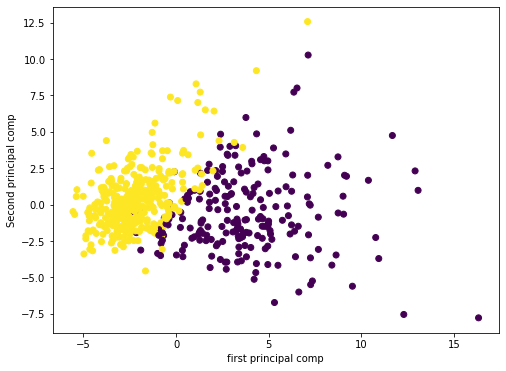

In [113]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel("first principal comp")
plt.ylabel("Second principal comp")
plt.show()

In [121]:
pca.components_ 
#each row represent principal component and each col represents original features

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [117]:
df_comp=pd.DataFrame(pca.components_,columns=cancer.feature_names)

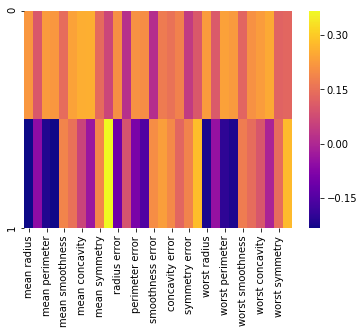

In [120]:
sns.heatmap(df_comp,cmap='plasma')

# K-MeansClustering

Used for unsupervised learning algorithm,used to make cluster based on simlarity

In [123]:
from sklearn.datasets import make_blobs

In [176]:
data=make_blobs(n_samples=200,n_features=2,centers=5,cluster_std=1.8,random_state=101)

In [168]:
data[0].shape

(200, 2)

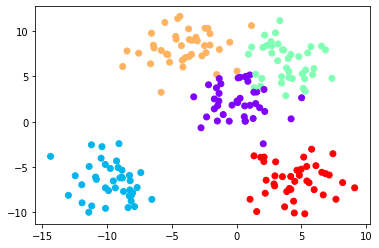

In [177]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [178]:
data[1]

array([2, 0, 4, 3, 4, 4, 4, 2, 3, 0, 0, 4, 1, 2, 2, 4, 0, 1, 2, 3, 0, 0,
       0, 1, 1, 0, 0, 4, 1, 2, 0, 3, 2, 3, 0, 1, 0, 3, 0, 4, 2, 1, 1, 2,
       0, 4, 2, 2, 2, 2, 1, 1, 4, 2, 4, 4, 1, 2, 1, 0, 0, 2, 4, 2, 2, 3,
       4, 3, 2, 3, 1, 3, 4, 2, 2, 2, 0, 1, 4, 1, 3, 3, 0, 4, 0, 1, 3, 4,
       2, 0, 3, 0, 0, 2, 4, 3, 1, 1, 3, 1, 2, 4, 0, 1, 3, 4, 1, 3, 0, 1,
       0, 1, 3, 1, 2, 4, 2, 1, 0, 3, 4, 2, 2, 3, 4, 3, 3, 4, 0, 4, 0, 1,
       4, 4, 4, 0, 2, 2, 4, 2, 3, 3, 3, 1, 1, 2, 1, 3, 4, 3, 0, 1, 4, 4,
       4, 4, 0, 3, 1, 4, 3, 2, 3, 1, 2, 0, 0, 4, 1, 0, 0, 3, 3, 0, 3, 0,
       4, 3, 0, 4, 3, 3, 2, 3, 4, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 2, 3, 3,
       1, 0])

In [179]:
from sklearn.cluster import KMeans

In [180]:
kmeans=KMeans(n_clusters=5)

In [181]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [182]:
kmeans.cluster_centers_ 

array([[-9.67666773, -6.62179987],
       [ 4.02336407,  6.8892669 ],
       [ 4.49344962, -6.36384301],
       [-4.34619653,  8.3173437 ],
       [ 0.15297186,  2.68079051]])

In [183]:
#predicted values of col data[1]
kmeans.labels_

array([1, 4, 2, 3, 2, 2, 2, 1, 3, 4, 4, 2, 0, 1, 1, 2, 4, 0, 4, 4, 4, 4,
       4, 0, 0, 4, 4, 2, 0, 1, 4, 3, 1, 1, 4, 0, 4, 3, 4, 2, 4, 0, 0, 1,
       4, 2, 1, 1, 1, 1, 0, 0, 2, 4, 2, 2, 0, 1, 0, 4, 4, 1, 2, 1, 1, 3,
       2, 3, 1, 3, 0, 3, 2, 1, 1, 1, 4, 0, 2, 0, 3, 3, 4, 2, 4, 0, 3, 2,
       1, 4, 3, 4, 4, 1, 2, 3, 0, 0, 3, 0, 1, 2, 4, 0, 3, 2, 0, 3, 4, 0,
       4, 0, 3, 0, 1, 2, 4, 0, 4, 3, 2, 1, 1, 3, 2, 3, 3, 2, 4, 2, 4, 0,
       2, 2, 2, 4, 1, 1, 2, 1, 3, 3, 3, 0, 0, 1, 0, 3, 2, 3, 4, 0, 2, 2,
       2, 2, 4, 3, 0, 2, 4, 1, 3, 0, 1, 4, 2, 2, 0, 4, 4, 3, 3, 4, 3, 4,
       2, 3, 4, 2, 3, 3, 4, 3, 2, 0, 0, 1, 0, 0, 0, 1, 0, 4, 1, 1, 3, 3,
       0, 1])

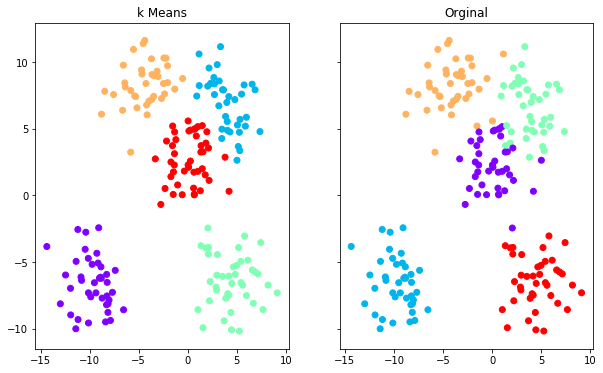

In [184]:
fig, (ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title("k Means")
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('Orginal')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')